# Exercice 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.
img = cv.imread('/content/Copie_de_Nature.jpg')

In [3]:
img.shape

(168, 300, 3)

In [8]:
b, g, r = cv.split(img)

# Afficher les dimensions des tableaux de composantes de couleur
print("tableau rouge :", r.shape)
print("tableau vert :", g.shape)
print("tableau bleu :", b.shape)



tableau rouge : (168, 300)
tableau vert : (168, 300)
tableau bleu : (168, 300)


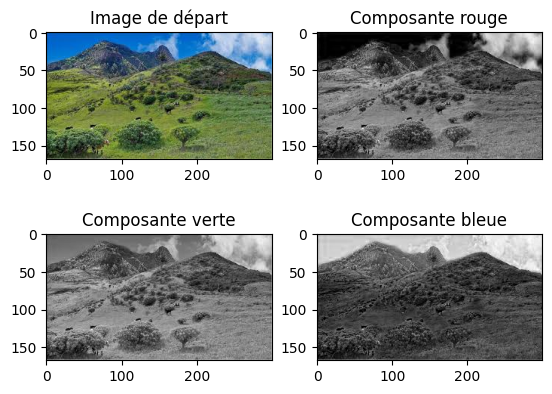

In [9]:
# 2.

# image de départ
plt.subplot(221)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Image de départ')

# composante rouge
plt.subplot(222)
plt.imshow(r, cmap='gray')
plt.title('Composante rouge')

# composante verte
plt.subplot(223)
plt.imshow(g, cmap='gray')
plt.title('Composante verte')

# composante bleue
plt.subplot(224)
plt.imshow(b, cmap='gray')
plt.title('Composante bleue')

plt.show()

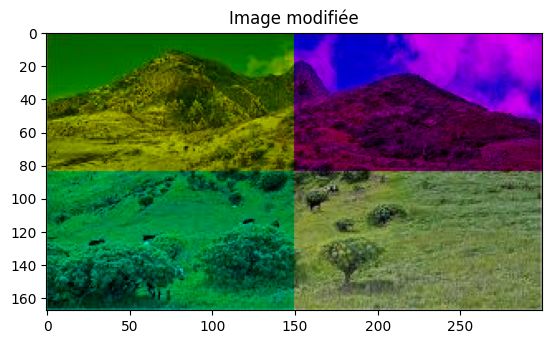

In [11]:
# 3. 

height, width, _ = img.shape

    
quadrant_height = height // 2
quadrant_width = width // 2

    
modified_image = np.copy(img)

# quart supérieur gauche
modified_image[:quadrant_height, :quadrant_width, 0] = 0

# quart supérieur droit
modified_image[:quadrant_height, quadrant_width:, 1] = 0

# quart inférieur gauche
modified_image[quadrant_height:, :quadrant_width, 2] = 0


plt.imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
plt.title('Image modifiée')
  
plt.show()


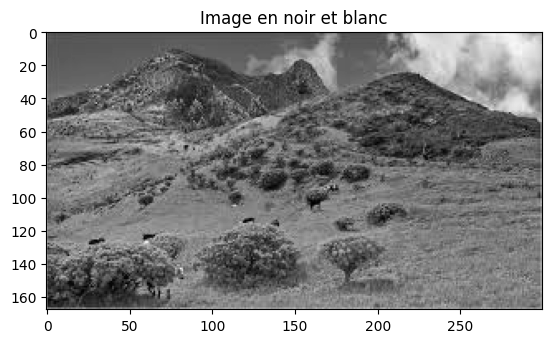

In [12]:
# image en niveaux de gris
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


plt.imshow(gray_image, cmap='gray')
plt.title('Image en noir et blanc')

plt.show()

In [13]:
# matrice des niveaux de gris
print("Matrice des niveaux de gris:")
print(gray_image)

Matrice des niveaux de gris:
[[167 119 127 ... 168 173 178]
 [121  73  81 ... 161 164 168]
 [121  73  81 ... 174 174 175]
 ...
 [103  25  36 ...  96  99 138]
 [104  42  41 ... 104 114 147]
 [152 116 123 ... 149 149 157]]


# Exercice 2

In [30]:
# 1.

image = cv.imread("/content/Copie_de_plaques_dimmatriculation.png")

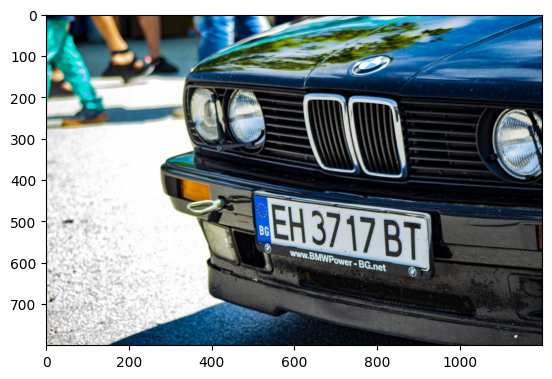

In [24]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

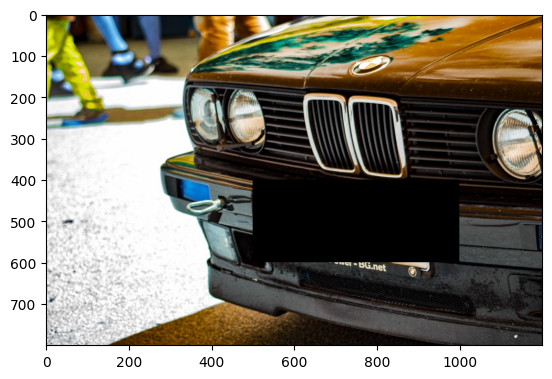

In [32]:
# Coordonnées de la plaque d'immatriculation 
x = 500
y = 400
width = 500
height = 200

plaque = image[y:y+height, x:x+width]

plaque_floue = cv.blur(plaque, (15, 15))

image[y:y+height, x:x+width] = 0

plt.imshow(image)

In [33]:
# 2. 

# a.

image = cv.imread("/content/Copie_de_plaques_dimmatriculation.png")

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [34]:
sobelx = cv.Sobel(gray_image,cv.CV_64F,1,0,ksize=7)
sobely = cv.Sobel(gray_image,cv.CV_64F,0,1,ksize=7)

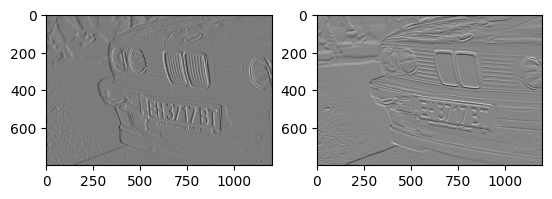

In [35]:
plt.subplot(1,2,1)
plt.imshow(sobelx, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sobely, cmap='gray')
plt.show()

In [36]:
# c.

# Calcul du gradient polaire
magnitude, angle = cv.cartToPolar(sobelx, sobely, angleInDegrees=True)

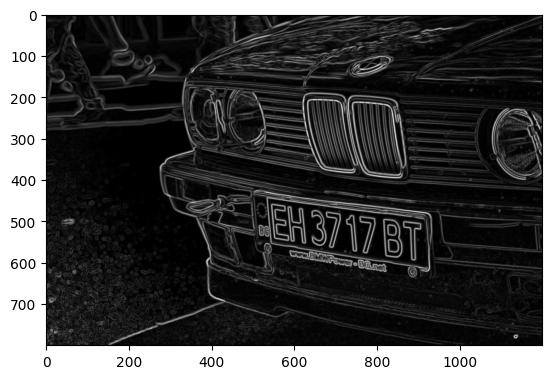

In [37]:
plt.imshow(magnitude, cmap='gray')
plt.show()

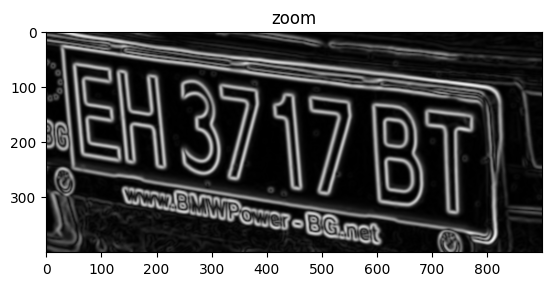

In [45]:
# d.

x = 520
y = 430
w = 450
h = 200

# Extraire la cible
cible = magnitude[y:y+h, x:x+w]

# Redimension de la cible
zoom = cv.resize(cible, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)

plt.imshow(zoom, cmap='gray')
plt.title("zoom")
plt.show()